In [1]:
import cv2
import numpy as np
import os
import lbp
from matplotlib import pyplot as plt
import pandas as pd


# Local Binary Patern

In [79]:
img1=cv2.imread('test.jpg')
img=cv2.resize(img1, [224,224], interpolation = cv2.INTER_AREA)
height,width,channel=img.shape
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_lbp = np.zeros((height, width,3), np.uint8)

In [80]:
def LBP_Value(img, centerPixel, x, y):
    LbpVal = 0
    try:
        if img[x][y] >= centerPixel:
            LbpVal = 1
    except:
        pass
    return LbpVal


In [81]:
def lbp_calculated_pixel(img, x, y):
   
    centerPixel = img[x][y]
   
    LBP_array = []
      
    # top_left
    LBP_array.append(LBP_Value(img, centerPixel, x-1, y-1))
      
    # top
    LBP_array.append(LBP_Value(img, centerPixel, x-1, y))
      
    # top_right
    LBP_array.append(LBP_Value(img, centerPixel, x-1, y + 1))
      
    # right
    LBP_array.append(LBP_Value(img, centerPixel, x, y + 1))
      
    # bottom_right
    LBP_array.append(LBP_Value(img, centerPixel, x + 1, y + 1))
      
    # bottom
    LBP_array.append(LBP_Value(img, centerPixel, x + 1, y))
      
    # bottom_left
    LBP_array.append(LBP_Value(img, centerPixel, x + 1, y-1))
      
    # left
    LBP_array.append(LBP_Value(img, centerPixel, x, y-1))
       
    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    val = 0
      
    for i in range(len(LBP_array)):
        val += LBP_array[i] * power_val[i]
          
    return val
   


In [82]:
def show_output(output_list):
    
    output_list_len = len(output_list)
    
    figure = plt.figure()
    
    for i in range(output_list_len):
        
        current_dict = output_list[i]
        
        current_img = current_dict["img"]
        
        current_xlabel = current_dict["xlabel"]
        
        current_ylabel = current_dict["ylabel"]
        
        current_xtick = current_dict["xtick"]
        
        current_ytick = current_dict["ytick"]
        
        current_title = current_dict["title"]
        
        current_type = current_dict["type"]
        
        current_plot = figure.add_subplot(1, output_list_len, i+1)
        
        if current_type == "gray":
            
            current_plot.imshow(current_img, cmap = plt.get_cmap('gray'))
            
            current_plot.set_title(current_title)
            
            current_plot.set_xticks(current_xtick)
            
            current_plot.set_yticks(current_ytick)
            
            current_plot.set_xlabel(current_xlabel)
            
            current_plot.set_ylabel(current_ylabel)
            
        elif current_type == "histogram":
            
            current_plot.plot(current_img, color = "black")
            
            current_plot.set_xlim([0,260])
            
            current_plot.set_title(current_title)
            
            current_plot.set_xlabel(current_xlabel)
            
            current_plot.set_ylabel(current_ylabel)  
            
            ytick_list = [int(i) for i in current_plot.get_yticks()]
            
            current_plot.set_yticklabels(ytick_list,rotation = 90)

    plt.show()

In [ ]:
for i in range(0, height):
    for j in range(0, width):
         img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

<ipython-input-82-364be69feeab>:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  current_plot.set_yticklabels(ytick_list,rotation = 90)


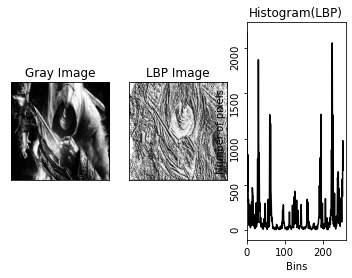

LBP Program is finished


In [83]:

hist_lbp = cv2.calcHist([img_lbp], [0], None, [255], [0, 255])
output_list = []
output_list.append({
    "img": img_gray,
    "xlabel": "",
    "ylabel": "",
    "xtick": [],
    "ytick": [],
    "title": "Gray Image",
    "type": "gray"        
})
output_list.append({
    "img": img_lbp,
    "xlabel": "",
    "ylabel": "",
    "xtick": [],
    "ytick": [],
    "title": "LBP Image",
    "type": "gray"
})    
output_list.append({
    "img": hist_lbp,
    "xlabel": "Bins",
    "ylabel": "Number of pixels",
    "xtick": None,
    "ytick": None,
    "title": "Histogram(LBP)",
    "type": "histogram"
})

show_output(output_list)

cv2.waitKey(0)
cv2.destroyAllWindows()


print("LBP Program is finished")

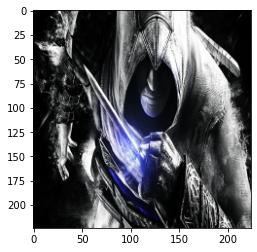

In [84]:
plt.imshow(img)

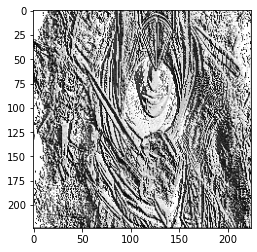

In [85]:
plt.imshow(img_lbp)

Local ternary pattern

# LTP


In [86]:
image1=cv2.imread('test.jpg')
image=cv2.resize(img1, [224,224], interpolation = cv2.INTER_AREA)

In [87]:
height,width,channel=image.shape

In [88]:
img_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [89]:
img_gray

array([[  0,   0,   0, ...,   2,   3,   2],
       [  0,   0,   0, ...,   2,   2,   1],
       [  0,   0,   0, ...,   1,   3,   2],
       ...,
       [  0,   0,   0, ..., 159, 163, 132],
       [  0,   0,   0, ..., 171, 187, 146],
       [  0,   0,   0, ..., 162, 185, 167]], dtype=uint8)

In [90]:
img_ltp = np.zeros((height, width,3), np.uint8)

In [91]:
def LTP_value(img, centerPixel, x, y):
    ltp = 0
    thresholdd=5
    try:
        if img[x][y]+thresholdd >= centerPixel:
            ltp = 1
        elif img[x][y]-thresholdd <= centerPixel:
            ltp = -1
    except:
        pass
    return ltp


In [92]:
def ltpCalculate(img, x, y):
   
    centerPixel = img[x][y]
   
    ltp_array = []
      
    # top_left
    ltp_array.append(LTP_value(img, centerPixel, x-1, y-1))
      
    # top
    ltp_array.append(LTP_value(img, centerPixel, x-1, y))
      
    # top_right
    ltp_array.append(LTP_value(img, centerPixel, x-1, y + 1))
      
    # right
    ltp_array.append(LTP_value(img, centerPixel, x, y + 1))
      
    # bottom_right
    ltp_array.append(LTP_value(img, centerPixel, x + 1, y + 1))
      
    # bottom
    ltp_array.append(LTP_value(img, centerPixel, x + 1, y))
      
    # bottom_left
    ltp_array.append(LTP_value(img, centerPixel, x + 1, y-1))
      
    # left
    ltp_array.append(LTP_value(img, centerPixel, x, y-1))

    upper=[]
    lower=[]
    for i in range(len(ltp_array)):
        if ltp_array[i]==1:
            upper.append(1)
        elif ltp_array[i]==-1:
            lower.append(1)
        else:
            upper.append(0)
            lower.append(0)

    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    valUpper = 0
    valLower = 0
    for i in range(len(upper)):
        valUpper += upper[i] * power_val[i]
    for i in range(len(lower)):
        valLower += lower[i] * power_val[i]
    
    valTotal=valUpper+valLower
          
    return valTotal
    
       


In [93]:
for i in range(0, height):
    for j in range(0, width):
         img_ltp[i,j] = ltpCalculate(img_gray, i, j)

<ipython-input-82-364be69feeab>:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  current_plot.set_yticklabels(ytick_list,rotation = 90)


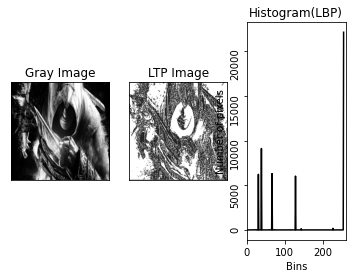

LBP Program is finished


In [94]:
hist_lbp = cv2.calcHist([img_ltp], [0], None, [256], [0, 256])
output_list = []
output_list.append({
    "img": img_gray,
    "xlabel": "",
    "ylabel": "",
    "xtick": [],
    "ytick": [],
    "title": "Gray Image",
    "type": "gray"        
})
output_list.append({
    "img": img_ltp,
    "xlabel": "",
    "ylabel": "",
    "xtick": [],
    "ytick": [],
    "title": "LTP Image",
    "type": "gray"
})    
output_list.append({
    "img": hist_lbp,
    "xlabel": "Bins",
    "ylabel": "Number of pixels",
    "xtick": None,
    "ytick": None,
    "title": "Histogram(LBP)",
    "type": "histogram"
})

show_output(output_list)

cv2.waitKey(0)
cv2.destroyAllWindows()


print("LBP Program is finished")

# VGG16


In [33]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np


In [ ]:
model = VGG16(weights='imagenet', include_top=False)



In [24]:
img_path = 'C:/Users/ziyad/Desktop/all desktop/Heriotwat/RP/Code/Research/GFG35.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)


In [32]:
temp = 0;
for featuredata in features[0, :]:
    if(temp<=999):
        print(len(featuredata)) #write ResNet features to file
temp = temp + 1


7
7
7
7
7
7
7


# ResNET


In [9]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np



In [12]:

model = ResNet50(weights='imagenet',include_top=False)


94773248/94765736 [==============================] - 5s 0us/step


In [14]:

img_path = 'C:/Users/ziyad/Desktop/all desktop/Heriotwat/RP/Code/Research/GFG35.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)


In [16]:
preds.shape

(1, 7, 7, 2048)

# LDN

In [95]:
img1=cv2.imread('test.jpg')
img=cv2.resize(img1, [224,224], interpolation = cv2.INTER_AREA)
height,width,channel=img.shape
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ldn = np.zeros((height, width,3), np.uint8)

In [96]:
def calculateMask(img, mask, x, y):
    total = 0
    try:
        image = np.array([[img[x-1][y-1], img[x-1][y], img[x-1][y+1]],
                          [img[x][y-1], img[x][y], img[x][y+1]],
                          [img[x+1][y-1], img[x+1][y], img[x+1][y+1]]],dtype=np.float32)
        for i in range(3):
            for j in range(3):
                total += image[i][j]*mask[i][j]
    except:
        pass
    return total


In [97]:
def ldpValue(img, x, y):
    
    edge = []
    
    m0 = np.array([[-3, -3,  5],
                    [-3,  0,  5],
                    [-3, -3,  5]], dtype=np.float32)

    m1 = np.array([[-3,  5,  5],
                    [-3,  0,  5],
                    [-3, -3, -3]], dtype=np.float32)

    m2 = np.array([[5,  5,  5],
                    [-3,  0, -3],
                    [-3, -3, -3]], dtype=np.float32)

    m3 = np.array([[5,  5, -3],
                    [5,  0, -3],
                    [-3, -3, -3]], dtype=np.float32)

    m4 = np.array([[5, -3, -3],
                    [5,  0, -3],
                    [5, -3, -3]], dtype=np.float32)

    m5 = np.array([[-3, -3, -3],
                    [5,  0, -3],
                    [5,  5, -3]], dtype=np.float32)

    m6 = np.array([[-3, -3, -3],
                    [-3,  0, -3],
                    [5,  5,  5]], dtype=np.float32)
                    
    m7 = np.array([[-3, -3, -3],
                    [-3,  0,  5],
                    [-3,  5,  5]], dtype=np.float32)
    # print(image)
    # print(m0)
    # g1 = cv2.normalize(cv2.filter2D(image, cv2.CV_32F, m0), None, 0, 3, cv2.NORM_MINMAX, cv2.CV_8UC1)
    # g2 = cv2.normalize(cv2.filter2D(image, cv2.CV_32F, m1), None, 0, 3, cv2.NORM_MINMAX, cv2.CV_8UC1)
    # g3 = cv2.normalize(cv2.filter2D(image, cv2.CV_32F, m2), None, 0, 3, cv2.NORM_MINMAX, cv2.CV_8UC1)
    # g4 = cv2.normalize(cv2.filter2D(image, cv2.CV_32F, m3), None, 0, 3, cv2.NORM_MINMAX, cv2.CV_8UC1)
    # g5 = cv2.normalize(cv2.filter2D(image, cv2.CV_32F, m4), None, 0, 3, cv2.NORM_MINMAX, cv2.CV_8UC1)
    # g6 = cv2.normalize(cv2.filter2D(image, cv2.CV_32F, m5), None, 0, 3, cv2.NORM_MINMAX, cv2.CV_8UC1)
    # g7 = cv2.normalize(cv2.filter2D(image, cv2.CV_32F, m6), None, 0, 3, cv2.NORM_MINMAX, cv2.CV_8UC1)
    # g8 = cv2.normalize(cv2.filter2D(image, cv2.CV_32F, m7), None, 0, 3, cv2.NORM_MINMAX, cv2.CV_8UC1)

    East = calculateMask(img, m0, x, y)
    NEast = calculateMask(img, m1, x, y)
    North = calculateMask(img, m2, x, y)
    NWest = calculateMask(img, m3, x, y)
    West = calculateMask(img, m4, x, y)
    SWest = calculateMask(img, m5, x, y)
    South = calculateMask(img, m6, x, y)
    SEast = calculateMask(img, m7, x, y)
    edge = [East,NEast,North,NWest,West,SWest,South,SEast]
    sortedEdge = np.sort(edge)
    high=edge.index(sortedEdge[-1])
    low=edge.index(sortedEdge[0])
    ldp = high*8+low
    return ldp


In [98]:
for i in range(1, height-1):
    for j in range(1, width-1):
         ldn[i][j] = ldpValue(img_gray, i, j)

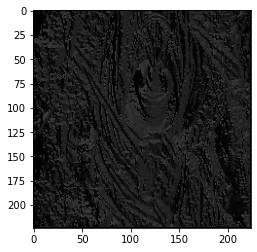

In [99]:
plt.imshow(ldn)

In [100]:
hist_lbp = cv2.calcHist([ldn], [0], None, [63], [0, 63])

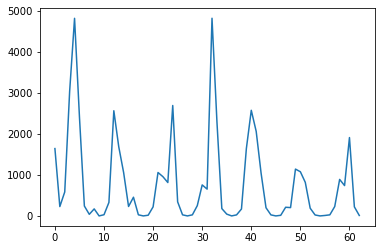

In [101]:
plt.plot(hist_lbp)

# LDSP

In [102]:
img1=cv2.imread('test.jpg')
img=cv2.resize(img1, [224,224], interpolation = cv2.INTER_AREA)
height,width,channel=img.shape
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ldsp = np.zeros((height, width,3), np.uint8)

In [103]:
def calculateMask(img, mask, x, y):
    total = 0
    try:
        image = np.array([[img[x-1][y-1], img[x-1][y], img[x-1][y+1]],
                          [img[x][y-1], img[x][y], img[x][y+1]],
                          [img[x+1][y-1], img[x+1][y], img[x+1][y+1]]],dtype=np.float32)
        for i in range(3):
            for j in range(3):
                total += image[i][j]*mask[i][j]
    except:
        pass
    return total


In [104]:
def calculateLDSP(p1,p2):
    diff=p1-p2
    #clockwise
    rotation=1
    if(diff<0):
        #antiClock
        rotation=0
    print(abs(diff))
    print(rotation)
    if((abs(diff)==1) and (rotation==1)):
        val=0
    elif((abs(diff)==1) and (rotation==0)):
        val=1
    elif((abs(diff)==2) and( rotation==1)):
        val=2
    elif((abs(diff)==2) and (rotation==0)):
        val=3
    else:
        val=4
    return val

In [105]:
def ldspValue(img, x, y):
    
    edge = []
    
    m0 = np.array([[-3, -3,  5],
                    [-3,  0,  5],
                    [-3, -3,  5]], dtype=np.float32)

    m1 = np.array([[-3,  5,  5],
                    [-3,  0,  5],
                    [-3, -3, -3]], dtype=np.float32)

    m2 = np.array([[5,  5,  5],
                    [-3,  0, -3],
                    [-3, -3, -3]], dtype=np.float32)

    m3 = np.array([[5,  5, -3],
                    [5,  0, -3],
                    [-3, -3, -3]], dtype=np.float32)

    m4 = np.array([[5, -3, -3],
                    [5,  0, -3],
                    [5, -3, -3]], dtype=np.float32)

    m5 = np.array([[-3, -3, -3],
                    [5,  0, -3],
                    [5,  5, -3]], dtype=np.float32)

    m6 = np.array([[-3, -3, -3],
                    [-3,  0, -3],
                    [5,  5,  5]], dtype=np.float32)
                    
    m7 = np.array([[-3, -3, -3],
                    [-3,  0,  5],
                    [-3,  5,  5]], dtype=np.float32)

    East = calculateMask(img, m0, x, y)
    NEast = calculateMask(img, m1, x, y)
    North = calculateMask(img, m2, x, y)
    NWest = calculateMask(img, m3, x, y)
    West = calculateMask(img, m4, x, y)
    SWest = calculateMask(img, m5, x, y)
    South = calculateMask(img, m6, x, y)
    SEast = calculateMask(img, m7, x, y)
    edge = [East,NEast,North,NWest,West,SWest,South,SEast]
    sortedEdge = np.sort(edge)
    p1=edge.index(sortedEdge[-1])
    p2=edge.index(sortedEdge[-2])
    s=calculateLDSP(p1,p2)
    if(s==4):
        ldspVal=img[x][y]
    else:
        ldspVal=4*p1+s
    return ldspVal


In [106]:
for i in range(1, height-1):
    for j in range(1, width-1):
         ldsp[i][j] = ldpValue(img_gray, i, j)

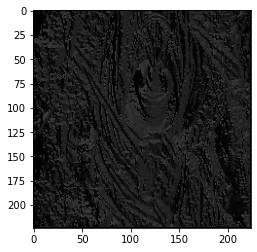

In [107]:
plt.imshow(ldsp)

In [74]:
hist_ldsp = cv2.calcHist([ldsp], [0], None, [63], [0, 63])

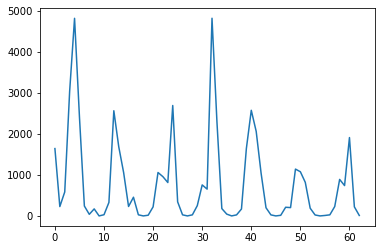

In [76]:
plt.plot(hist_ldsp)

In [78]:
hist_ldsp.shape

(63, 1)